In [230]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LinearRegression as LM
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [145]:
print(digits.data[0])
print(digits.images[0])
print(digits.target[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


<Figure size 432x288 with 0 Axes>

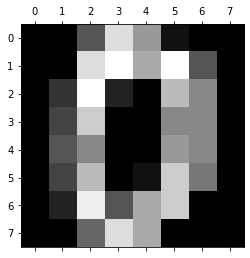

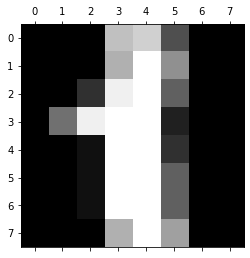

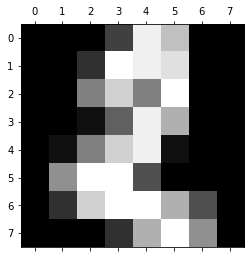

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(3):
    plt.matshow(digits.images[i])

In [147]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.75, random_state=23)
print(len(x_test))
print(x_test)

450
[[ 0.  0.  0. ...  7.  0.  0.]
 [ 0.  0.  0. ... 14.  1.  0.]
 [ 0.  0. 12. ...  0.  0.  0.]
 ...
 [ 0.  1. 14. ...  0.  0.  0.]
 [ 0.  0. 10. ... 11.  2.  0.]
 [ 0.  0. 12. ... 15.  6.  0.]]


### Logistic Regression

In [148]:
lr = LR(solver="liblinear", multi_class="ovr")
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9511111111111111

### Suppport Vector Machine

In [149]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

0.9911111111111112

### RandomForest

In [234]:
rfc = rf(n_estimators=4000)
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9491525423728814

### K-fold

In [238]:
#################################################################################################################################################
from sklearn.model_selection import KFold
import random
kf = KFold(n_splits=3, random_state=23, shuffle=True)
kf

KFold(n_splits=3, random_state=23, shuffle=True)

In [239]:
random.randint(0, 10)

3

In [240]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[0 1 3 6 7 8] [2 4 5]
[0 2 3 4 5 6] [1 7 8]
[1 2 4 5 7 8] [0 3 6]


In [157]:
def get_score(model):#, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [159]:
print(get_score(lr))#, x_train, x_test, y_train, y_test))
print(get_score(svm))#, x_train, x_test, y_train, y_test))
print(get_score(rfc))#, x_train, x_test, y_train, y_test))

0.9632721202003339
0.986644407345576
0.9716193656093489


In [222]:
scores_lr_kf = []
scores_svm_kf = []
scores_rfc_kf = []
for train_index, test_index in kf.split(digits.data):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_lr_kf.append(get_score(lr))#, x_train, x_test, y_train, y_test))
    scores_svm_kf.append(get_score(svm))#, x_train, x_test, y_train, y_test))
    scores_rfc_kf.append(get_score(rfc))#, x_train, x_test, y_train, y_test))
print("lr_kf:", round(sum(scores_lr_kf)/len(scores_lr_kf),2), 
      "\nsvm_kf:", round(sum(scores_svm_kf)/len(scores_svm_kf),2), 
      "\nrfc_kf:", round(sum(scores_rfc_kf)/len(scores_rfc_kf),2))

lr_kf: 0.96 
svm_kf: 0.99 
rfc_kf: 0.98


### Stratified-fold

In [223]:
#################################################################################################################################################
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3, random_state=23, shuffle=True)
folds

StratifiedKFold(n_splits=30, random_state=23, shuffle=True)

In [224]:
scores_lr_folds = []
scores_svm_folds = []
scores_rfc_folds = []
for train_index, test_index in folds.split(digits.data, digits.target):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    scores_lr_folds.append(get_score(lr))#, x_train, x_test, y_train, y_test))
    scores_svm_folds.append(get_score(svm))#, x_train, x_test, y_train, y_test))
    scores_rfc_folds.append(get_score(rfc))#, x_train, x_test, y_train, y_test))
print("lr_folds:", round(sum(scores_lr_folds)/len(scores_lr_folds),2), 
      "\nsvm_folds:", round(sum(scores_svm_folds)/len(scores_svm_folds),2), 
      "\nrfc_folds:", round(sum(scores_rfc_folds)/len(scores_rfc_folds),2))

lr_folds: 0.97 
svm_folds: 0.99 
rfc_folds: 0.98


In [241]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, digits.data, digits.target)
cross_val_score(svm, digits.data, digits.target)
cross_val_score(rfc, digits.data, digits.target)

array([0.93333333, 0.91388889, 0.95543175, 0.9637883 , 0.9275766 ])

## asgn12

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as rf

In [10]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

### trian_test_split

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.75, random_state=23)
print(len(x_test))
print(x_test)

38
[[6.9 3.1 5.4 2.1]
 [7.2 3.2 6.  1.8]
 [5.8 2.7 4.1 1. ]
 [4.6 3.1 1.5 0.2]
 [5.7 2.5 5.  2. ]
 [6.9 3.1 4.9 1.5]
 [5.7 3.8 1.7 0.3]
 [6.4 3.1 5.5 1.8]
 [5.4 3.4 1.7 0.2]
 [5.6 2.9 3.6 1.3]
 [6.1 2.8 4.7 1.2]
 [4.8 3.1 1.6 0.2]
 [7.1 3.  5.9 2.1]
 [5.1 3.8 1.5 0.3]
 [5.4 3.7 1.5 0.2]
 [6.3 2.8 5.1 1.5]
 [6.4 3.2 4.5 1.5]
 [6.1 2.9 4.7 1.4]
 [7.7 3.  6.1 2.3]
 [5.2 3.4 1.4 0.2]
 [6.4 3.2 5.3 2.3]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.7 3.2 1.3 0.2]
 [6.7 3.1 5.6 2.4]
 [5.1 3.5 1.4 0.3]
 [5.1 3.8 1.9 0.4]
 [6.2 2.8 4.8 1.8]
 [6.6 3.  4.4 1.4]
 [5.6 2.5 3.9 1.1]
 [4.9 3.1 1.5 0.1]
 [5.2 2.7 3.9 1.4]
 [5.4 3.9 1.3 0.4]
 [7.7 2.8 6.7 2. ]
 [5.  3.4 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [6.5 2.8 4.6 1.5]
 [5.  2.3 3.3 1. ]]


#### Logistic Regression

In [12]:
lr = LR(solver="liblinear", multi_class="ovr")
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

1.0

#### SVM

In [13]:
svm = SVC()
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

1.0

#### Random Forest

In [14]:
rfc = rf()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.9736842105263158

### CV

In [16]:
import numpy as np
from sklearn.model_selection import cross_val_score
lr_scores = cross_val_score(LR(solver="liblinear", multi_class="ovr"), iris.data, iris.target)
svm_scores = cross_val_score(SVC(), iris.data, iris.target)
rfc_scores = cross_val_score(rf(n_estimators=40), iris.data, iris.target)
print("lr:", np.average(lr_scores), "\nsvm:", np.average(svm_scores), "\nrfc:", np.average(rfc_scores))

lr: 0.9600000000000002 
svm: 0.9666666666666666 
rfc: 0.96


In [20]:
#################################################################################################################################################
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3, random_state=23, shuffle=True)
folds
def get_score(model):#, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)
scores_lr_folds = []
scores_svm_folds = []
scores_rfc_folds = []
for train_index, test_index in folds.split(iris.data, iris.target):
    x_train, x_test, y_train, y_test = iris.data[train_index], iris.data[test_index], \
                                        iris.target[train_index], iris.target[test_index]
    scores_lr_folds.append(get_score(lr))#, x_train, x_test, y_train, y_test))
    scores_svm_folds.append(get_score(svm))#, x_train, x_test, y_train, y_test))
    scores_rfc_folds.append(get_score(rfc))#, x_train, x_test, y_train, y_test))
print("lr_folds:", round(sum(scores_lr_folds)/len(scores_lr_folds),2), 
      "\nsvm_folds:", round(sum(scores_svm_folds)/len(scores_svm_folds),2), 
      "\nrfc_folds:", round(sum(scores_rfc_folds)/len(scores_rfc_folds),2))

lr_folds: 0.95 
svm_folds: 0.96 
rfc_folds: 0.95
